# Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [5]:

df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.shape

(150, 5)

In [8]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [9]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

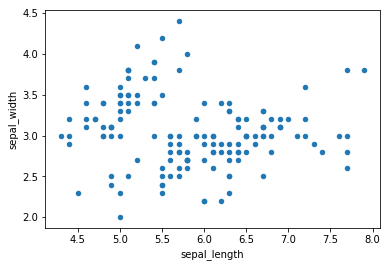

In [10]:
df.plot(kind='scatter', x = 'sepal_length', y = 'sepal_width');
plt.show()

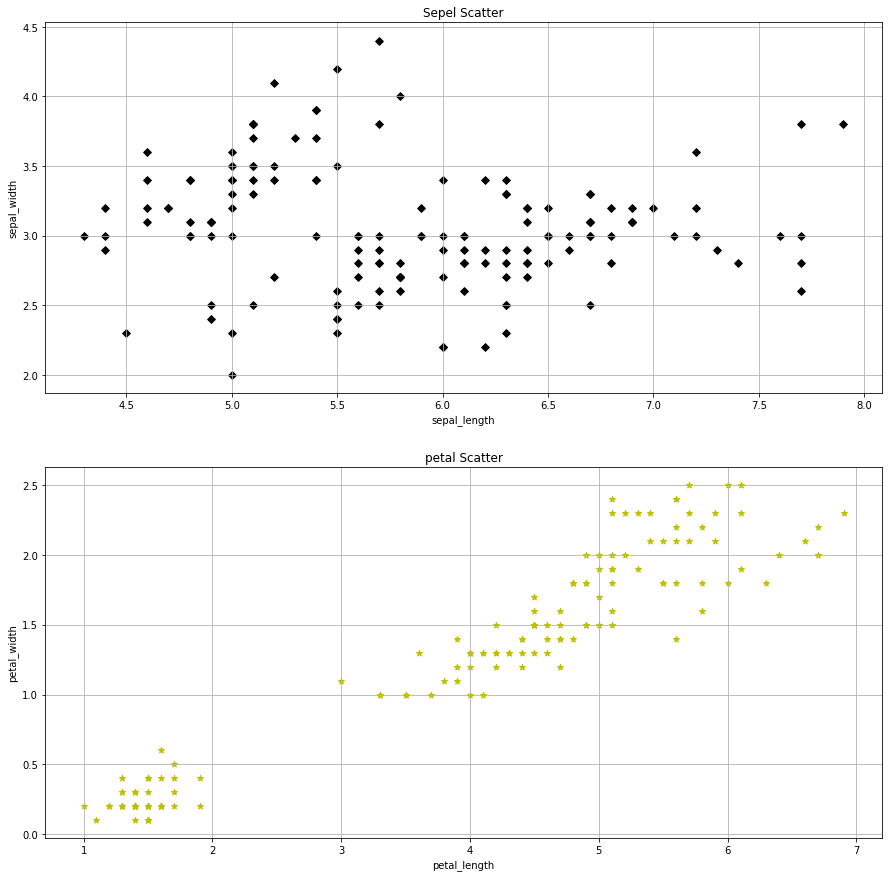

In [11]:
fig = plt.figure(figsize=(15,15))
plt.subplot(211)
#plt.subplots_adjust(bottom = 0.5)
plt.scatter(x = 'sepal_length', y = 'sepal_width', data = df, color = 'k', s = 30, marker = 'D')
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.title("Sepel Scatter")
plt.grid()

plt.subplot(212)
plt.scatter(x = 'petal_length', y = 'petal_width', data = df, color = 'y', s = 40, marker = '*')
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.title("petal Scatter")
plt.grid()

fig.savefig('out.png', dpi=100)

<Figure size 1080x1080 with 0 Axes>

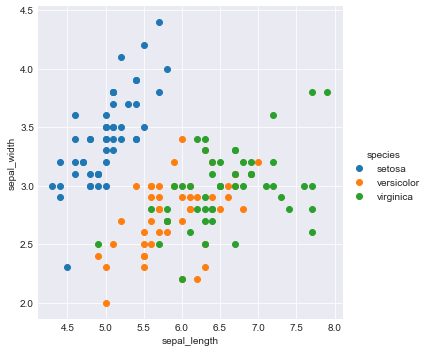

In [12]:
plt.figure(figsize=(15,15))
sns.set_style("darkgrid");
sns.FacetGrid(df, hue = 'species', size = 5) \
   .map(plt.scatter, 'sepal_length', 'sepal_width') \
   .add_legend();

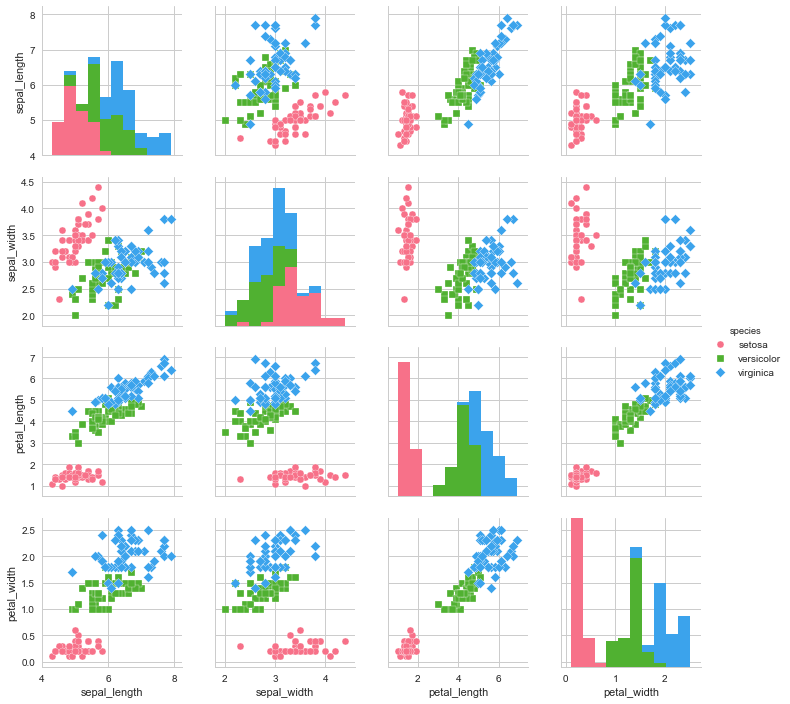

In [115]:
plt.close()
sns.set_style('whitegrid');
sns.pairplot(df, hue="species", markers=["o", "s", "D"], palette="husl")

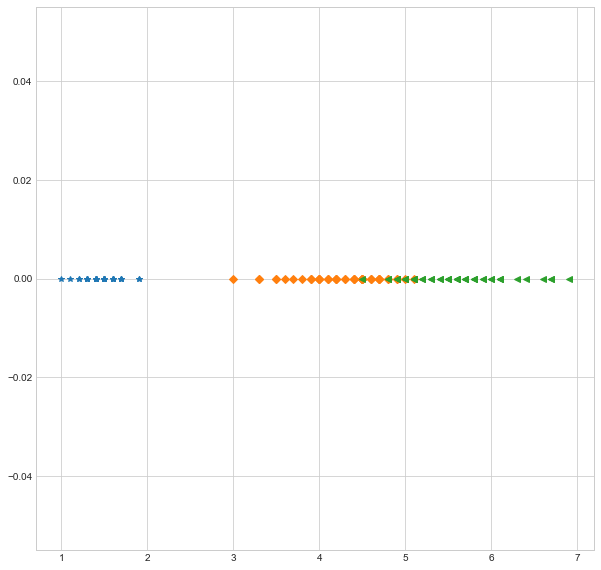

In [17]:
plt.close()
fig = plt.figure(figsize=(10, 10))
iris_setosa = df.loc[df["species"] == "setosa"];
iris_virginica = df.loc[df["species"] == "virginica"];
iris_versicolor = df.loc[df["species"] == "versicolor"];

#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), '*')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'D')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), '<')

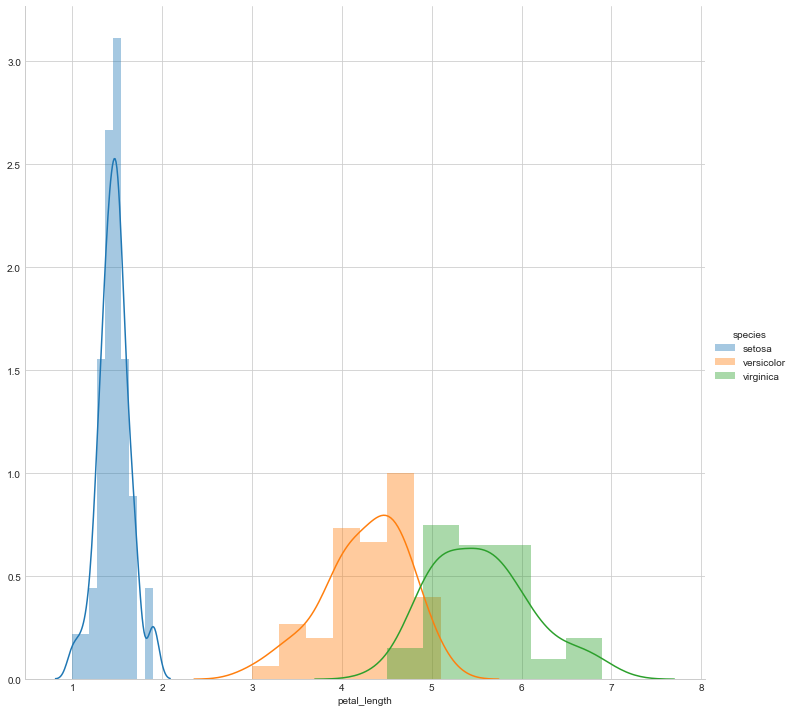

In [29]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();
# pdf is a smooth histogrm

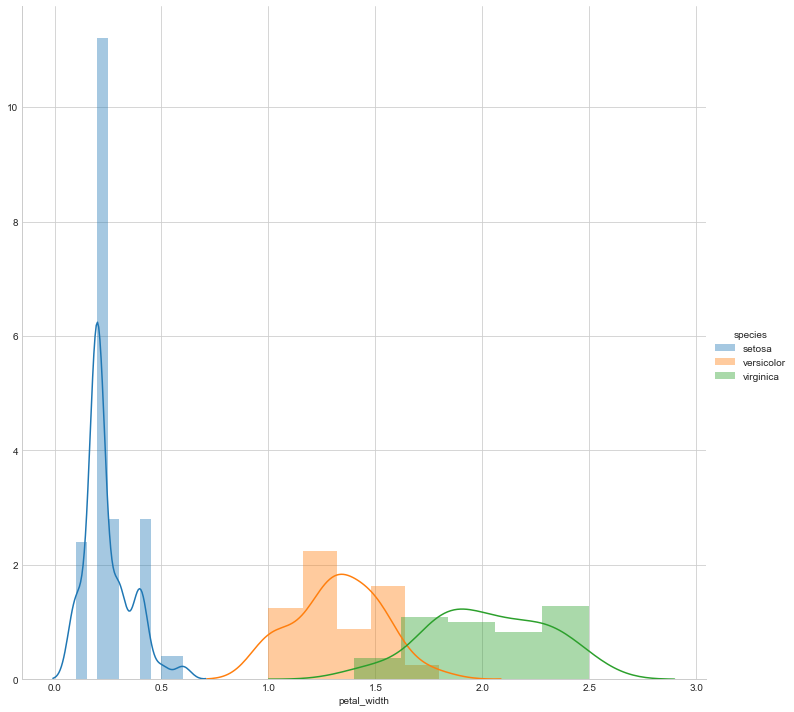

In [30]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

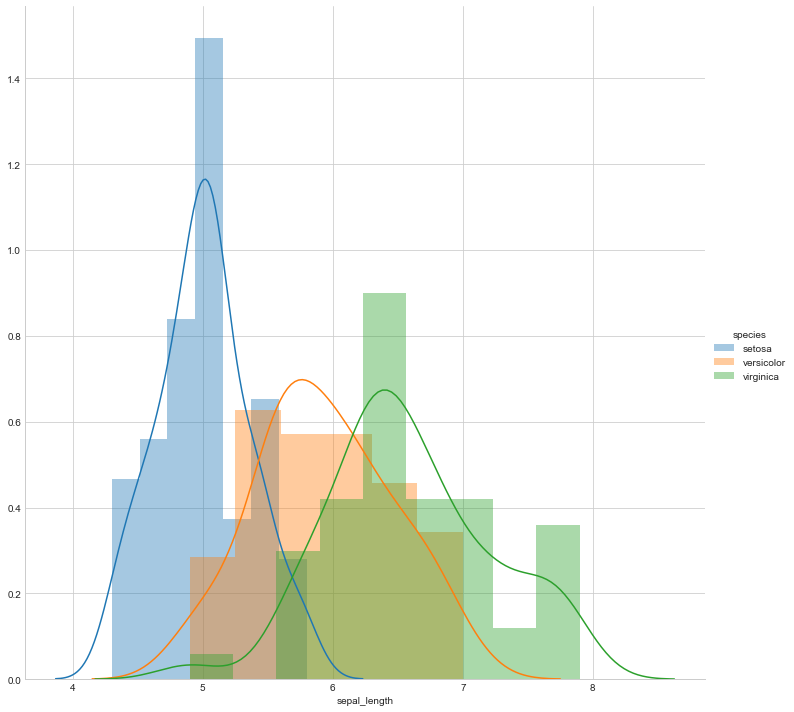

In [31]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

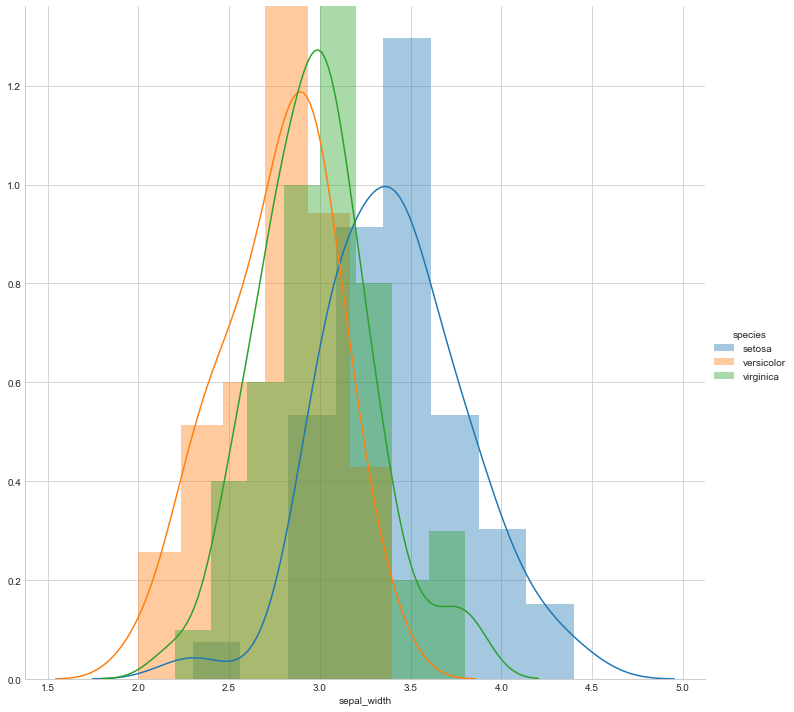

In [32]:
sns.FacetGrid(df, hue="species", size=10) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


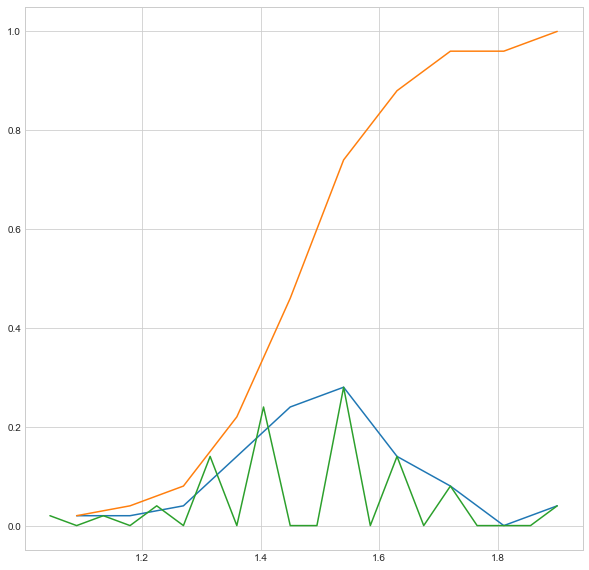

In [35]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                density = True)
fig = plt.figure(figsize=(10, 10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


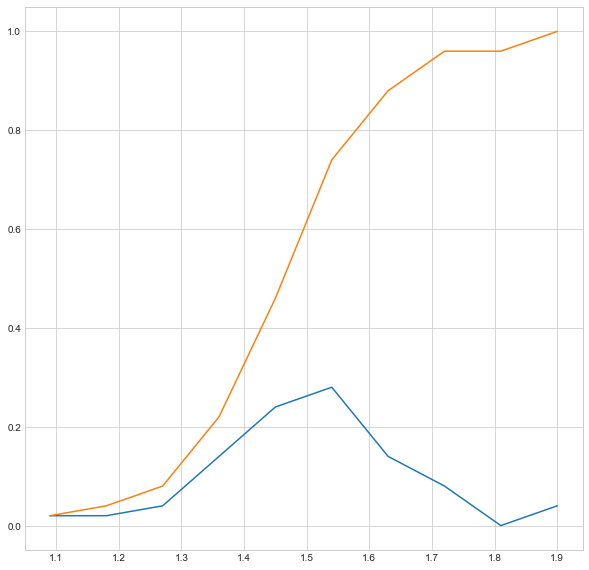

In [36]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                density = True)
fig = plt.figure(figsize=(10, 10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();



[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


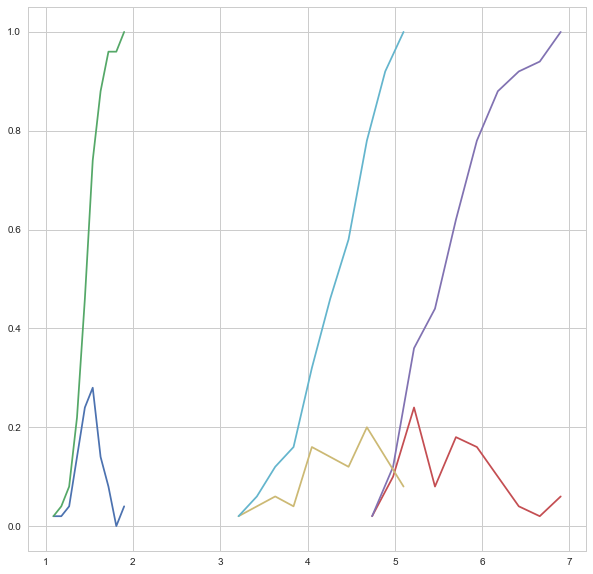

In [114]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.


plt.style.use('seaborn-whitegrid')
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
fig = plt.figure(figsize=(10, 10))
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.figure(1)
# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

#plt.savefig('test.png')


plt.close()

In [47]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [50]:
pwd

'C:\\Users\\Shubham'

In [51]:
cd desktop

C:\Users\Shubham\desktop


In [54]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))

Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


In [55]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


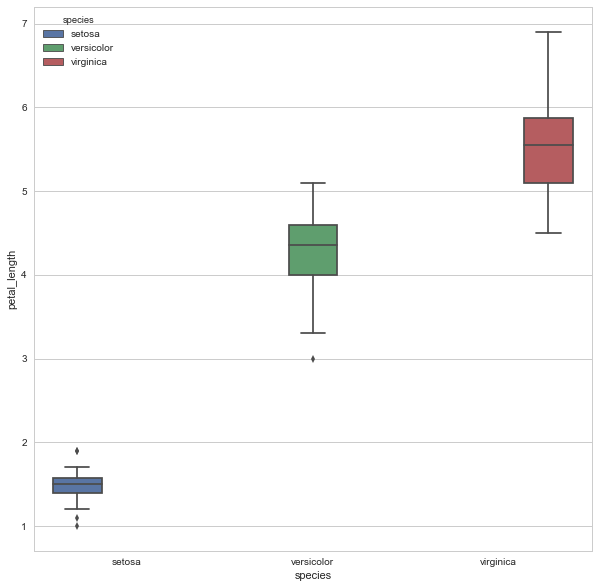

In [109]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.
plt.close()
fig = plt.figure(figsize=(10, 10))
plt.style.use('ggplot')
sns.set(style="whitegrid")
sns.boxplot(x='species',y='petal_length', hue = 'species', data=df)

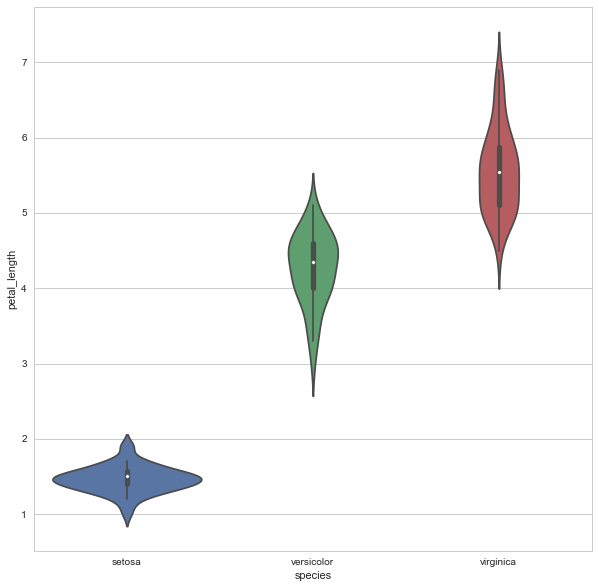

In [113]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot
plt.close()
fig = plt.figure(figsize=(10, 10))
plt.style.use('seaborn-whitegrid')
sns.violinplot(x="species", y="petal_length", data=df, size=8)
#plt.show()

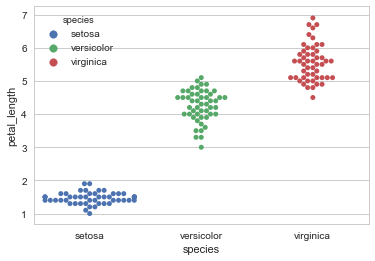

In [92]:
plt.close()
#fig = plt.figure(figsize=(10, 10))
sns.swarmplot(x="species", y="petal_length", hue = 'species', data=df)

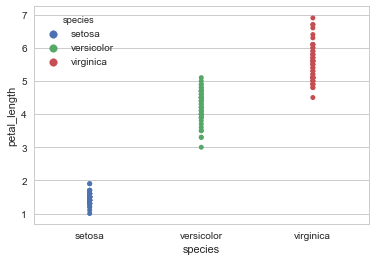

In [91]:
plt.close()
#fig = plt.figure(figsize=(10, 10))
sns.stripplot(x="species", y="petal_length", hue = 'species', data=df)

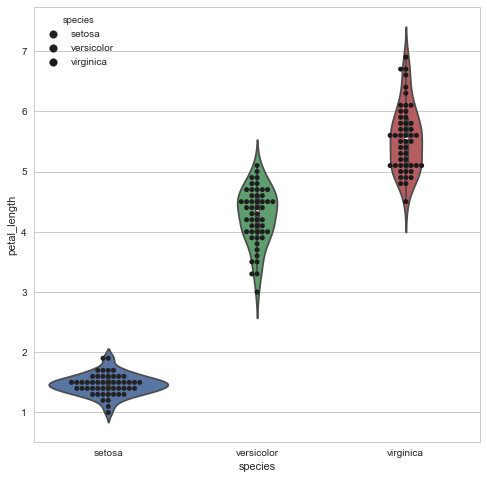

In [105]:
plt.close()
fig = plt.figure(figsize=(8, 8))
sns.violinplot(x="species", y="petal_length", data=df)
sns.swarmplot(x="species", y="petal_length",  hue = 'species', data=df, color=".1")

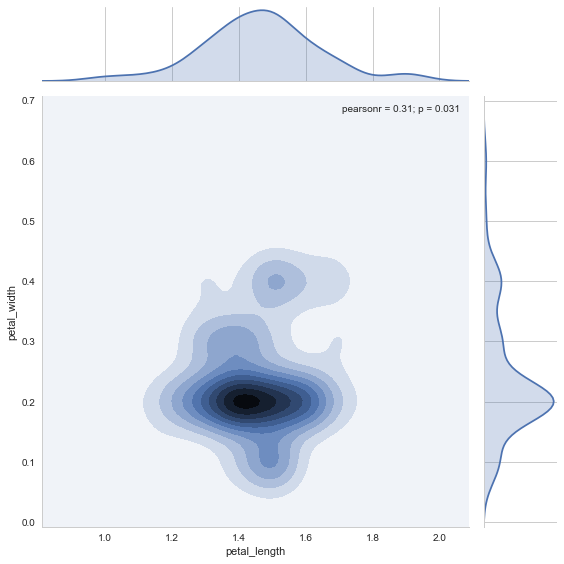

In [117]:
#2D Density plot, contors-plot
plt.close()
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde", size = 8)
plt.show()

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.